In [2]:
import numpy as np
from knn import KNN
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

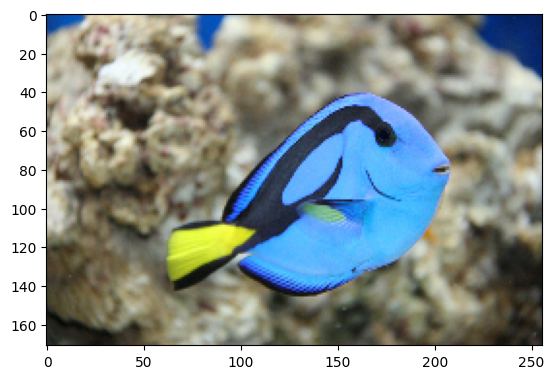

In [4]:
dory = cv2.imread("Picture/Dory-Flickr-Image-scaled.jpg")
dory = cv2.resize(dory, (0,0), fx=0.1, fy=0.1)
dory = cv2.cvtColor(dory, cv2.COLOR_BGR2RGB)
plt.imshow(dory)
plt.show()


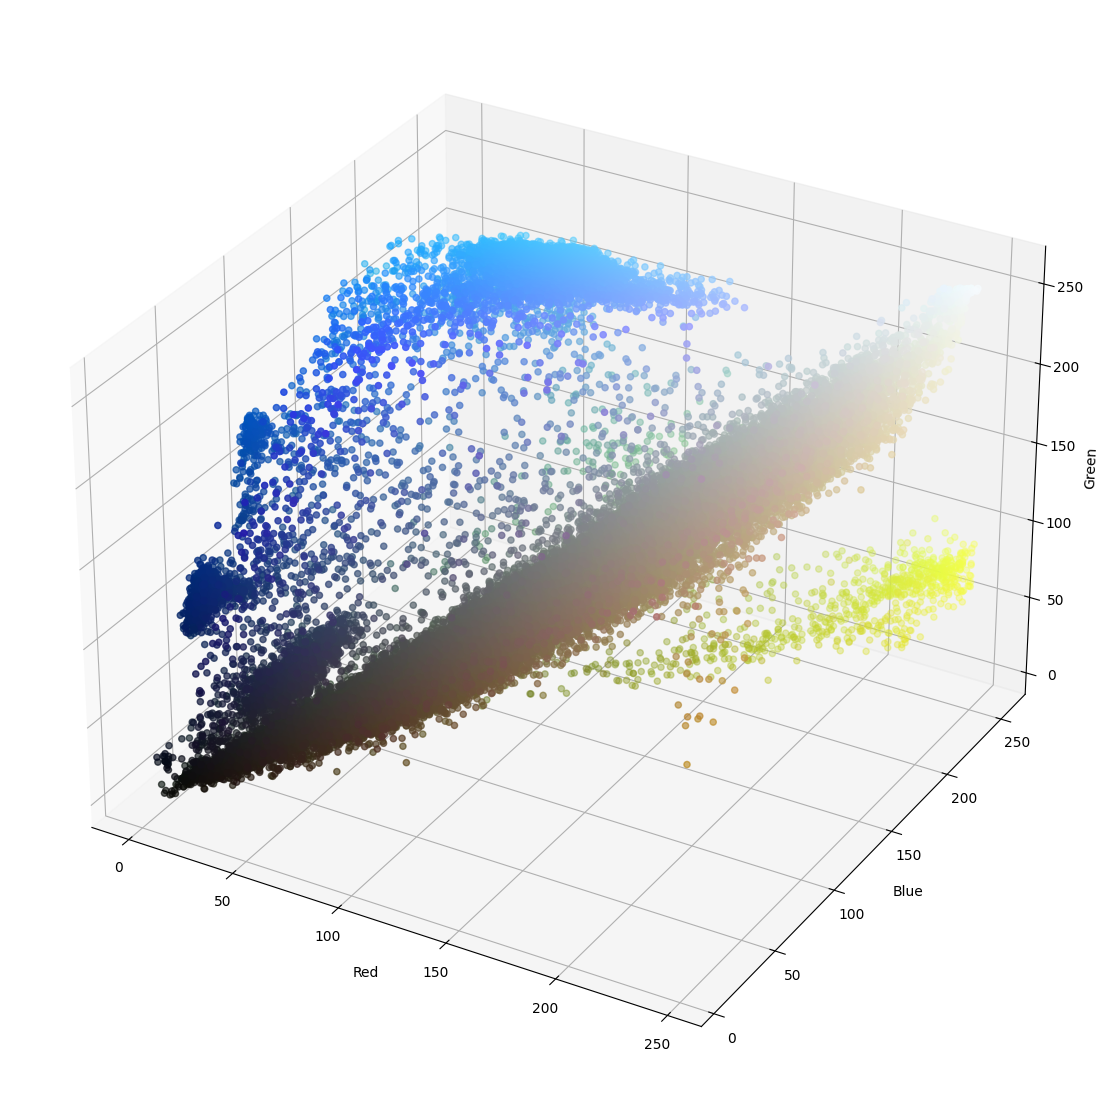

In [5]:
pixels_list_rgb = dory.reshape(-1, 3) # we dont know how many row = -1
pixels_list_rgb.shape
fig = plt.figure(figsize=(14,16))
ax = fig.add_subplot(projection = "3d")
ax.scatter(pixels_list_rgb[:, 0], pixels_list_rgb[:, 1], pixels_list_rgb[:, 2], c=pixels_list_rgb / 255)
ax.set_xlabel("Red")
ax.set_ylabel("Blue")
ax.set_zlabel("Green")
plt.show()

In [6]:
dory_hsv = cv2.cvtColor(dory, cv2.COLOR_RGB2HSV)

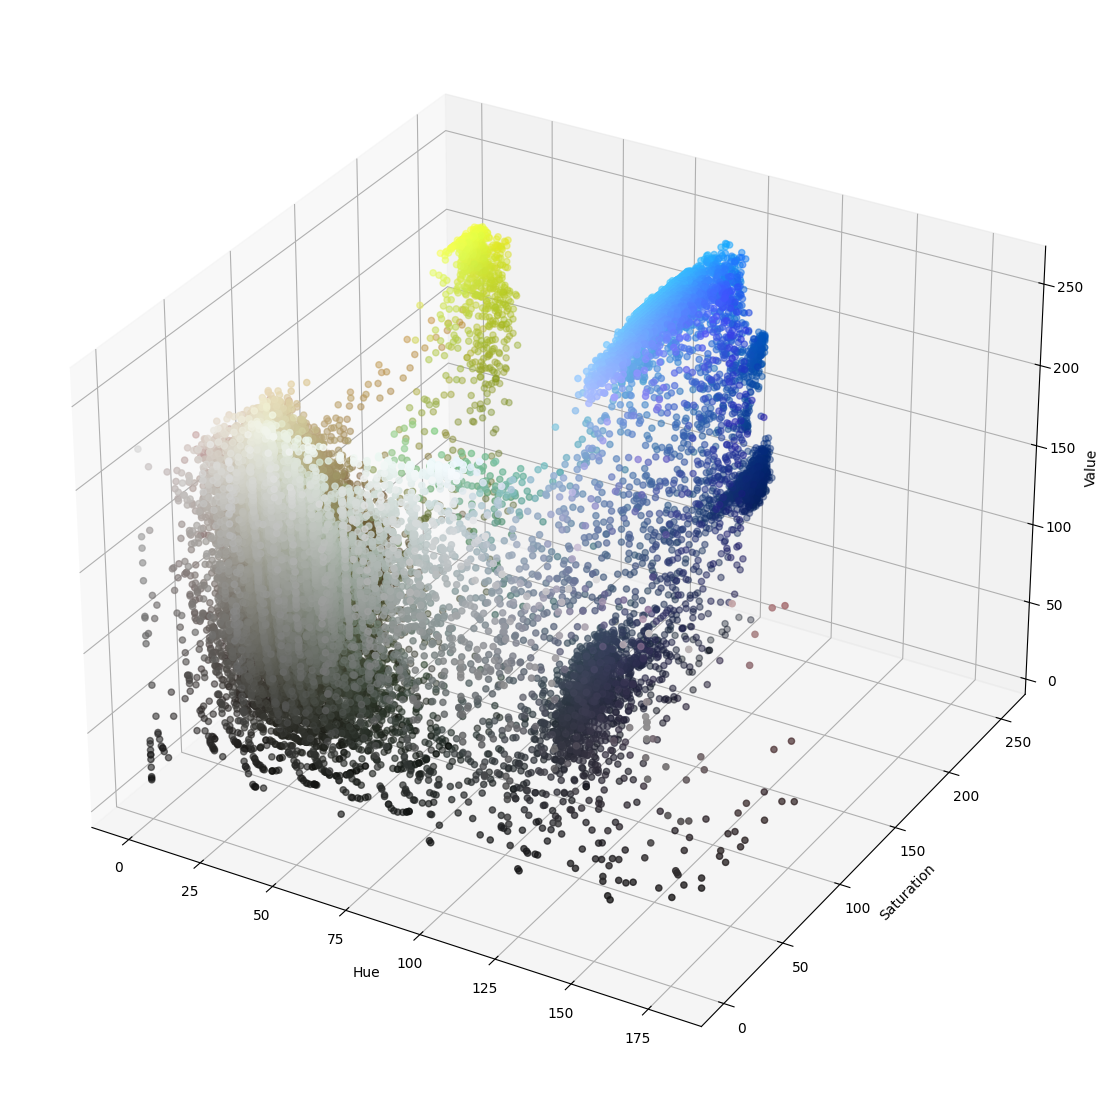

In [7]:
pixels_list_hsv = dory_hsv.reshape(-1, 3)

fig = plt.figure(figsize=(14,16))
ax = fig.add_subplot(projection = "3d")
ax.scatter(pixels_list_hsv[:, 0], pixels_list_hsv[:, 1], pixels_list_hsv[:, 2], c=pixels_list_rgb / 255)
ax.set_xlabel("Hue")
ax.set_ylabel("Saturation")
ax.set_zlabel("Value")
plt.show()

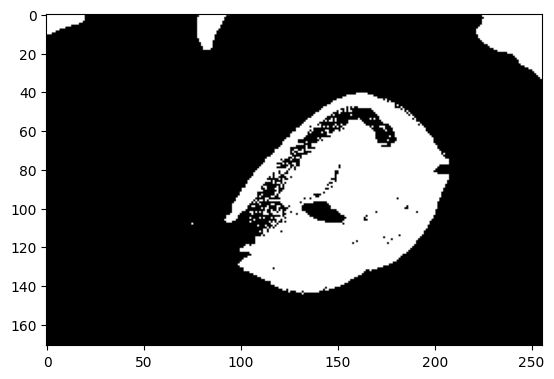

In [8]:
light_blue = (100, 100, 50)
dark_blue = (140, 255, 255)

mask = cv2.inRange(dory_hsv, light_blue, dark_blue)
plt.imshow(mask, cmap="gray")
plt.show()

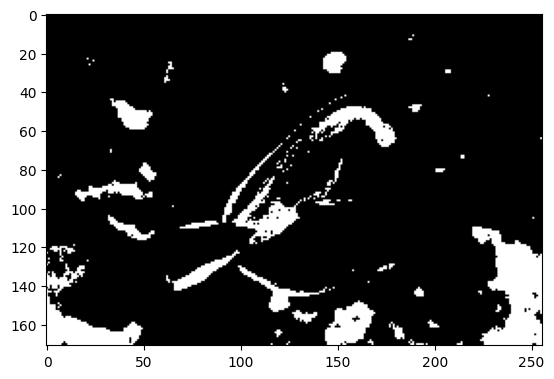

In [9]:
light_black = (0, 0, 0)
dark_black = (180, 255, 70)

mask_black = cv2.inRange(dory_hsv, light_black, dark_black)
plt.imshow(mask_black, cmap="gray")
plt.show()

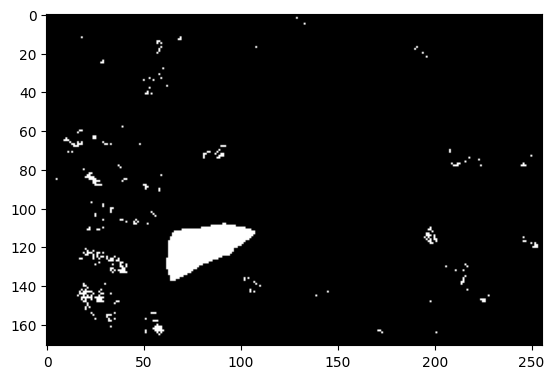

In [10]:
light_yellow = (20, 100, 100)
dark_yellow = (40, 255, 255)

mask_yellow = cv2.inRange(dory_hsv, light_yellow, dark_yellow)
plt.imshow(mask_yellow, cmap="gray")
plt.show()

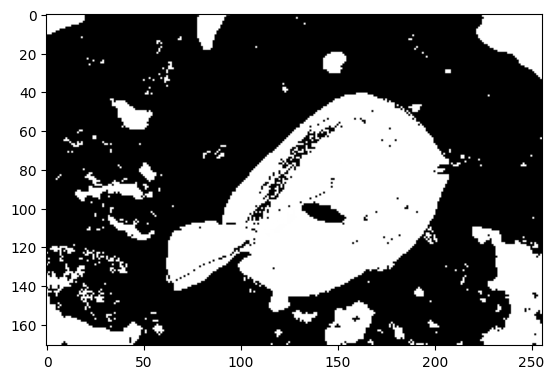

In [11]:
final_mask = mask + mask_black + mask_yellow
plt.imshow(final_mask, cmap="gray")
plt.show()

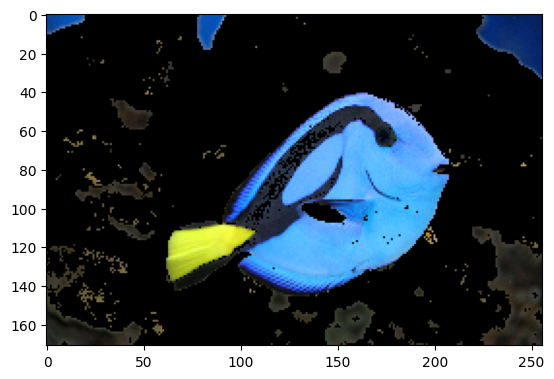

In [12]:
final_result = cv2.bitwise_and(dory, dory, mask=final_mask)
plt.imshow(final_result)
plt.show()

In [13]:
X_train = pixels_list_hsv / 255
X_train.shape

(43776, 3)

In [14]:
Y_train = final_mask.reshape(-1,) //255
Y_train.shape

(43776,)

In [15]:
Y_train

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [16]:
knn = KNN(k=3)
knn.fit(X_train, Y_train)

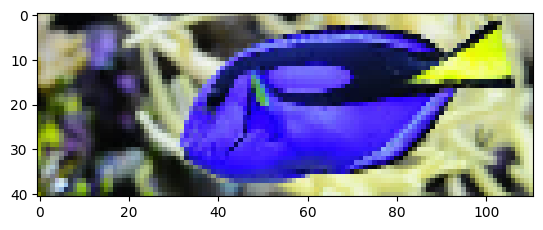

In [18]:
dory_2 = cv2.imread("Picture/images.jpg")
dory_2 = cv2.resize(dory_2, (0,0), fx=0.3, fy=0.3)
dory_2 = cv2.cvtColor(dory_2, cv2.COLOR_BGR2RGB)
plt.imshow(dory_2)
plt.show()

In [19]:
dory_2_hsv = cv2.cvtColor(dory_2, cv2.COLOR_RGB2HSV)
dory_2_hsv.shape

(41, 111, 3)

In [20]:
X_test = dory_2_hsv.reshape(-1, 3) / 255
X_test.shape

(4551, 3)

In [21]:
Y_pred = knn.predict(X_test)
Y_pred

[0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


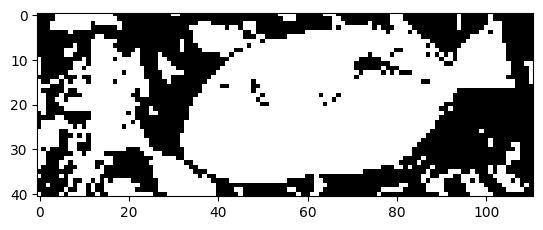

In [22]:
output = np.array(Y_pred).reshape(dory_2.shape[:2])
plt.imshow(output, cmap="gray")
plt.show()

In [23]:
output = output.astype("uint8")

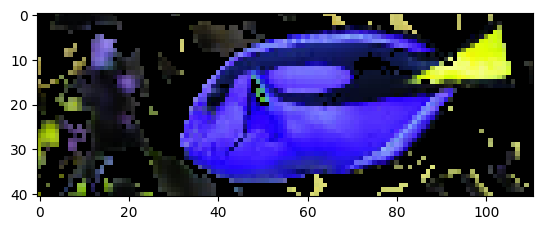

In [24]:
final_result_2 = cv2.bitwise_and(dory_2, dory_2, mask=output)
plt.imshow(final_result_2)
plt.show()